# Histogram Equalization
### : Histogram Stretching의 단점을 보완한 방법

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
src = np.array([[0, 0, 0, 0],
                [1, 1, 3, 5],
                [6, 1, 1, 3],
                [4, 3, 1, 7]
                ], dtype=np.uint8)

dst = cv2.equalizeHist(src)  # L_MAX = 255
print('dst =', dst)

dst = [[  0   0   0   0]
 [106 106 170 212]
 [234 106 106 170]
 [191 170 106 255]]


In [9]:
src = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)
dst = cv2.equalizeHist(src)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

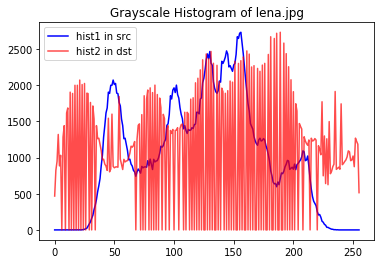

In [5]:
plt.title('Grayscale Histogram of lena.jpg')

hist1 = cv2.calcHist(images=[src], channels=[0], mask=None,
                    histSize=[256], ranges=[0, 256])
plt.plot(hist1, color='b', label='hist1 in src')

hist2 = cv2.calcHist(images=[dst], channels=[0], mask=None,
                    histSize=[256], ranges=[0, 256])
plt.plot(hist2, color='r', alpha=0.7, label='hist2 in dst')
plt.legend(loc='best')
plt.show()

In [11]:
src = cv2.imread('./data/lena.jpg')

#1 제일 많이 쓰는 방법. 성능이 잘 나옴
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)
v2 = cv2.equalizeHist(v)  # 명도/밝기(v)값만 평활화한다.
hsv2 = cv2.merge([h, s, v2])
dst = cv2.cvtColor(hsv2, cv2.COLOR_HSV2BGR)

#2
yCrCv = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
y, Cr, Cv = cv2.split(yCrCv)
y2 = cv2.equalizeHist(y) # y값만 평활화 한다.
yCrCv2 = cv2.merge([y2, Cr, Cv])
dst2 = cv2.cvtColor(yCrCv2, cv2.COLOR_YCrCb2BGR)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.imshow('dst2', dst2)
cv2.waitKey()
cv2.destroyAllWindows()

- **히스토그램 평활화(Histogram Equalization)**
    - 영상의 픽셀 값 분포가 그레이스케일 전체영역에서 균일하게 분포하도록 변경하는 알고리즘
    - 특정 발기값 근방에 몰려 있는 픽셀 분포를 분산시킴
    - 히스토그램 누적함수 H(g)를 이용하여 계산

$
H(g) = \sum_{0≤i≤g}h(i)
$

- $H(h)$ : 히스토그램 누적 함수
- $h(g)$: 밝기값이 g인 픽셀의 개수
- $N$: 영상 픽셀 개수, $L_{max}: 255$

$
dst(x, y) = round(H(src(x, y)) \times \frac{L_{max}}{N})
$